# Day 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1943 MCP 뉴런

In [2]:
random = np.random.default_rng(1)
x = np.linspace(0.1, 1.1, 5)
w = random.normal(0, 1, size=x.shape)

z = np.dot(x, w)
print(f'z = {z:.2f}')

b = 0.3
y = 1 if z > b else -1
print(f'y = {y}')

pd.DataFrame({'x': x, 'w': w, 'wx': x * w}).round(2).T

z = 0.41
y = 1


,0,1,2,3,4
x,0.10,0.35,0.60,0.85,1.10
w,0.35,0.82,0.33,-1.30,0.91
wx,0.03,0.29,0.20,-1.11,1.00


In [3]:
def MCP뉴런(x, w, b):
    z = np.dot(x, w) + b
    y = 1 if z > 0 else -1
    return y

random = np.random.default_rng(1)
x = np.linspace(0.1, 1.1, 5)
w = random.normal(0, 1, size=x.shape)
b = 0.3 
y = MCP뉴런(x, w, b)
print(f'x={x.round(2)} -> f(x; w, b) = {y:}')

x=[0.1  0.35 0.6  0.85 1.1 ] -> f(x; w, b) = 1


## 논리 회로

In [4]:
def logic(w, b):
    for xi in np.array([(0, 0), (0, 1), (1, 0), (1, 1)]):
        yi = MCP뉴런(xi, w, b)
        print(f'x={xi} -> {yi if yi > 0 else 0}')

w_and = np.array([0.5, 0.5])
b_and = -0.7
print('AND')
logic(w_and, b_and)

AND
x=[0 0] -> 0
x=[0 1] -> 0
x=[1 0] -> 0
x=[1 1] -> 1


$$
\begin{aligned}
z &= w^{\top} x + b = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b
\\
y &= 
\begin{cases}
+1 \quad z > 0 \\
-1 \quad z \leq 0
\end{cases}
\end{aligned}
$$

입력 벡터 $\mathbf{x} = \left(x_1, x_2\right)$ 경우,

$$
z = w_1 x_1 + w_2 x_2 + b
$$

결정경계 $z = 0$ 

$$
\begin{aligned}
0 &= w_1 x_1 + w_2 x_2 + b
\\
x_2 &= \frac{w_1}{-w_2} x_1 + \frac{b}{-w_2}
\end{aligned}
$$

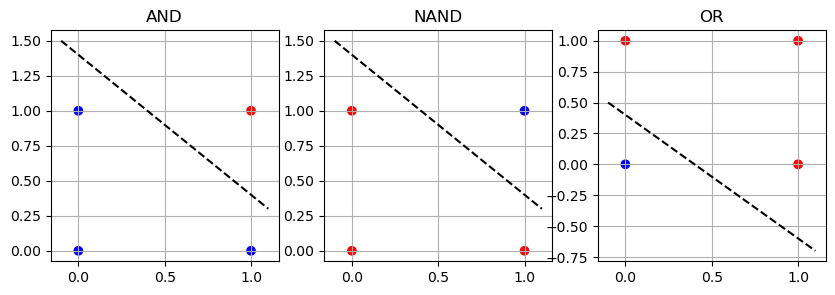

In [5]:
Xs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

plt.figure(figsize=(10, 3)) # 그림틀 크기 지정: 가로, 세로
plt.subplot(1, 3, 1) # 1행 3열 중 첫번째
y_and = np.array([0, 0, 0, 1])
plt.scatter(Xs[:, 0], Xs[:, 1], c=y_and, cmap='bwr')
# 결정경계
z0 = lambda x, w, b: (w[0] * x + b) / -w[1]
x = np.linspace(-0.1, 1.1, 10)
plt.plot(x, z0(x, w_and, b_and), 'k--')
plt.title('AND')
plt.grid()
plt.subplot(1, 3, 2) # 1행 3열 중 두번째
y_nand = np.array([1, 1, 1, 0])
plt.scatter(Xs[:, 0], Xs[:, 1], c=y_nand, cmap='bwr')
plt.title('NAND')
w_nand = np.array([-0.5, -0.5]); b_nand = 0.7
plt.plot(x, z0(x, w_nand, b_nand), 'k--')
plt.grid()

plt.subplot(1, 3, 3) # 1행 3열 중 세번째
y_or = np.array([0, 1, 1, 1])
plt.scatter(Xs[:, 0], Xs[:, 1], c=y_or, cmap='bwr')
plt.title('OR')
w_or = np.array([0.5, 0.5]); b_or = -0.2
plt.plot(x, z0(x, w_or, b_or), 'k--')
plt.grid()
# 결정경계
plt.show()

## 1958 퍼셉트론

In [13]:
samples = np.arange(10)

pd.DataFrame({
    'samples': samples,
    'x < 5': samples < 5,
    'np.where': np.where(samples < 5, 1, -1)
}).T

,0,1,2,3,4,5,6,7,8,9
samples,0,1,2,3,4,5,6,7,8,9
x < 5,True,True,True,True,True,False,False,False,False,False
np.where,1,1,1,1,1,-1,-1,-1,-1,-1


In [16]:
samples = np.random.default_rng(1).normal(0, 1, size=(3, 4))
print(samples.round(2))
print(np.where(samples > 0, 1, -1))

[[ 0.35  0.82  0.33 -1.3 ]
 [ 0.91  0.45 -0.54  0.58]
 [ 0.36  0.29  0.03  0.55]]
[[ 1  1  1 -1]
 [ 1  1 -1  1]
 [ 1  1  1  1]]


In [31]:
import numpy as np

class 퍼셉트론:
    def __init__(self, w=None, b=None):
        self.w = w
        self.b = b

    def __call__(self, x):
        z = np.dot(x, self.w) + self.b
        y = np.where(z > 0, 1, -1)
        return y
    
    def fit(self, data, target, 학습횟수, 학습률=1.0):
        """학습 알고리즘"""
        표본수, 특성수 = data.shape
        # 매개변수 초기화
        self.w = np.zeros(특성수, dtype=np.float32)
        self.b = 0.0
        매개변수변화 = []
        for epoch in range(학습횟수):
            매개변수변화.append(np.append(self.b, self.w))
            # 각 표본별 오차 계산
            for xi, yi in zip(data, target):
                예측값 = self(xi)
                오차 = yi - 예측값
                갱신 = 오차 * 학습률
                self.w += 갱신 * xi
                self.b += 갱신
        
        return 매개변수변화

Xs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# AND = 퍼셉트론(w=np.array([0.5, 0.5]), b=-0.7)
AND = 퍼셉트론()
y_and = np.array([-1, -1, -1, 1])
params = AND.fit(Xs, y_and, 학습횟수=10)
# print('AND')
# print(pd.DataFrame(params, columns=['b', 'w1', 'w2']))
assert np.all(AND(Xs) == y_and)

# NAND = 퍼셉트론(w=np.array([-0.5, -0.5]), b=0.7)
NAND = 퍼셉트론()
y_nand = np.array([1, 1, 1, -1])
params = NAND.fit(Xs, y_nand, 학습횟수=10)
# print('NAND')
# print(pd.DataFrame(params, columns=['b', 'w1', 'w2']))
assert np.all(NAND(Xs) == y_nand)

# OR = 퍼셉트론(w=np.array([0.5, 0.5]), b=-0.2)
OR = 퍼셉트론()
y_or = np.array([-1, 1, 1, 1])
params = OR.fit(Xs, y_or, 학습횟수=10)
print('OR')
print(pd.DataFrame(params, columns=['b', 'w1', 'w2']))
assert np.all(OR(Xs) == y_or)

OR
     b   w1   w2
0  0.0  0.0  0.0
1  2.0  0.0  2.0
2  2.0  2.0  2.0
3  0.0  2.0  2.0
4  0.0  2.0  2.0
5  0.0  2.0  2.0
6  0.0  2.0  2.0
7  0.0  2.0  2.0
8  0.0  2.0  2.0
9  0.0  2.0  2.0


Q: 왜 이런 걸 알아야 할까요? 그냥 신경망으로 문제를 푸는데 집중할 수는 없나요?

In [22]:
import torch

layer1 = torch.nn.Linear(5, 4)
layer2 = torch.nn.Linear(4, 3)
layer3 = torch.nn.Linear(3, 2)
layer4 = torch.nn.Linear(2, 1)

Xs = torch.randn(6, 5)
z1 = layer1(Xs)
# torch.nn.Linear = X @ W^T + b
assert torch.allclose(z1, Xs @ layer1.weight.T + layer1.bias)

model = torch.nn.Sequential(
    layer1, torch.nn.ReLU(),
    layer2, torch.nn.ReLU(),
    layer3, torch.nn.ReLU(),
    layer4
)

## 종양 데이터셋

미국 위스콘신 대학 병원에서 제공한 실측 데이터

In [35]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(cancer.data.shape)
print(cancer.target_names, '->', np.unique(cancer.target))
pd.DataFrame(cancer.data, columns=cancer.feature_names).head().round(2)

(569, 30)
['malignant' 'benign'] -> [0 1]


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.12,0.28,0.30,0.15,0.24,0.08,...,25.38,17.33,184.60,2019.0,0.16,0.67,0.71,0.27,0.46,0.12
1,20.57,17.77,132.90,1326.0,0.08,0.08,0.09,0.07,0.18,0.06,...,24.99,23.41,158.80,1956.0,0.12,0.19,0.24,0.19,0.28,0.09
2,19.69,21.25,130.00,1203.0,0.11,0.16,0.20,0.13,0.21,0.06,...,23.57,25.53,152.50,1709.0,0.14,0.42,0.45,0.24,0.36,0.09
3,11.42,20.38,77.58,386.1,0.14,0.28,0.24,0.11,0.26,0.10,...,14.91,26.50,98.87,567.7,0.21,0.87,0.69,0.26,0.66,0.17
4,20.29,14.34,135.10,1297.0,0.10,0.13,0.20,0.10,0.18,0.06,...,22.54,16.67,152.20,1575.0,0.14,0.20,0.40,0.16,0.24,0.08


In [50]:
종양모형 = 퍼셉트론()
# 알고리즘의 기대 출력에 맞춰 목표값 변환
y_cancer = np.where(cancer.target == 0, -1, 1)
print(np.unique(cancer.target), '->', np.unique(y_cancer))
params = 종양모형.fit(cancer.data, y_cancer, 학습횟수=100, 학습률=0.1)
예측 = 종양모형(cancer.data)
채점 = 예측 == y_cancer
print(f'{sum(채점)}/{len(채점)} = {np.mean(채점):.1%}')
pd.DataFrame(params).tail().round(2)

[0 1] -> [-1  1]
515/569 = 90.5%


,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
95,126.6,955.21,-316.26,4752.26,738.05,4.04,-26.84,-51.32,-18.54,6.98,...,1037.51,-791.84,4113.14,-1853.17,2.43,-92.69,-136.69,-31.58,-3.92,-0.66
96,127.0,957.86,-331.43,4757.64,712.01,4.02,-27.12,-51.76,-18.70,6.93,...,1040.99,-815.19,4112.58,-1838.15,2.36,-93.56,-137.98,-31.88,-4.15,-0.72
97,127.6,961.82,-343.63,4769.02,676.71,4.00,-27.45,-52.28,-18.88,6.88,...,1045.81,-834.54,4116.00,-1848.89,2.30,-94.67,-139.53,-32.23,-4.39,-0.80
98,128.4,969.12,-349.13,4802.37,808.91,3.98,-27.76,-52.79,-19.05,6.88,...,1053.86,-842.92,4139.63,-1712.37,2.25,-95.77,-141.02,-32.53,-4.53,-0.86
99,128.4,967.79,-375.94,4779.75,681.99,3.90,-28.18,-53.34,-19.24,6.71,...,1052.37,-884.19,4103.25,-1853.57,2.09,-97.12,-142.72,-32.94,-5.01,-1.00


## 가설공간

$$
\text{Linear Model} = \mathbf{w}^{\top} \mathbf{x} + b
$$

선형 모형의 출력을 활용하는 방식에 따라, 회귀 또는 분류가 됩니다.

* 회귀 (Regression): 
    $$ \hat{y} = \mathbf{w}^{\top} \mathbf{x} + b \in \mathbb{R} $$
* 분류 (classification):
    $$
    \begin{aligned}
    z &= \mathbf{w}^{\top} \mathbf{x} + b \\
    \hat{y} &=
    \begin{cases}
    +1 \quad z > 0 \\
    -1 \quad z \leq 0
    \end{cases}
    \end{aligned}
    $$

정확도: 100.0%


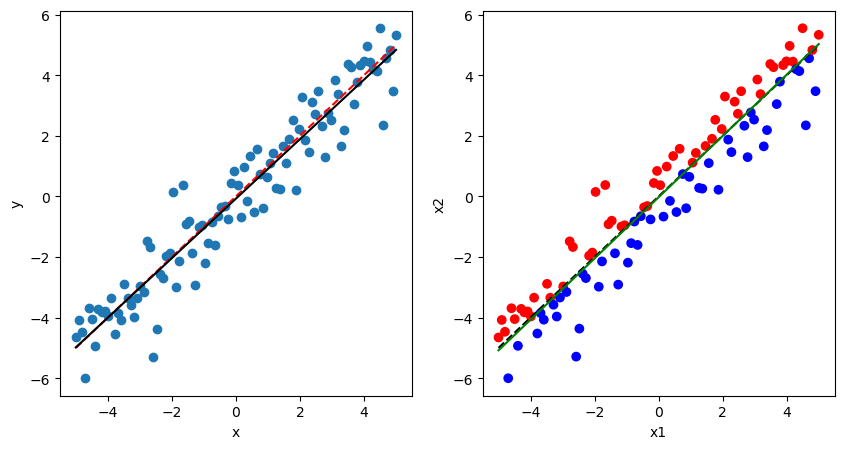

In [67]:
from sklearn.linear_model import LinearRegression

xs = np.linspace(-5, 5, 100)
noise = np.random.default_rng(1).normal(0, 1, size=xs.shape)
ys = xs + noise

linreg = LinearRegression()
data = xs.reshape(-1, 1); target = ys
linreg.fit(data, target)

perceptron = 퍼셉트론()
X2 = np.column_stack((xs, ys)) # x = (x1, x2) = (x, y)
target = np.where(ys > ys - noise, 1, -1)
params = perceptron.fit(X2, target, 학습횟수=30, 학습률=0.01)
print(f'정확도: {np.mean(perceptron(X2) == target):.1%}')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(xs, ys)
plt.xlabel('x'); plt.ylabel('y')
plt.plot(xs, ys - noise, 'r--')
plt.plot(xs, linreg.predict(data), color='black')

plt.subplot(1, 2, 2)
plt.scatter(xs, ys, c=target, cmap='bwr')
plt.xlabel('x1'); plt.ylabel('x2')
plt.plot(xs, xs, 'k--')
# 결정경계
z0 = lambda x, w, b: (w[0] * x + b) / -w[1]
plt.plot(xs, z0(xs, perceptron.w, perceptron.b), 'g')

plt.show()

## 1969 XOR 문제

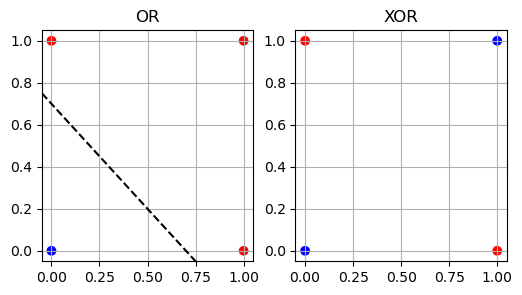

In [87]:
Xs = np.array([(0, 0), (0, 1), (1, 0), (1, 1)])

OR = 퍼셉트론()
y_or = np.array([-1, 1, 1, 1])
params = OR.fit(Xs, y_or, 학습횟수=10)
assert np.all(OR(Xs) == y_or)

AND = 퍼셉트론(w=np.array([0.5, 0.5]), b=-0.7)
assert np.all(AND(Xs) == np.array([-1, -1, -1, 1]))
NAND = 퍼셉트론(w=np.array([-0.5, -0.5]), b=0.7)
assert np.all(NAND(Xs) == np.array([1, 1, 1, -1]))

# XOR = 퍼셉트론()
def XOR(Xs):
    s1 = NAND(Xs)
    s2 = OR(Xs)
    S = np.column_stack((s1, s2))
    y = AND(S)
    return y

y_xor = np.array([-1, 1, 1, -1])
# params = XOR.fit(Xs, y_xor, 학습횟수=10)
try:
    assert np.all(XOR(Xs) == y_xor)
except AssertionError:
    print('XOR 미해결', XOR(Xs))

plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.scatter(Xs[:, 0], Xs[:, 1], c=y_or, cmap='bwr')
# 결정경계 예시
plt.axline((0, 0.7), slope=-1, color='k', linestyle='--')
plt.title('OR')
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(Xs[:, 0], Xs[:, 1], c=y_xor, cmap='bwr')
# plt.axline((0, 0.3), slope=1, color='k', linestyle='--')
plt.title('XOR')
plt.grid()

plt.show()

## 다중 퍼셉트론

신경망의 계층은 종종 여러 개의 퍼셉트론이 동시에 입력을 처리합니다. 그래서 다중(multi) 퍼셉트론 구성과 연산이 필요합니다.

In [108]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.data.shape)
print(iris.target_names, '->', np.unique(iris.target)) # 다중 유형 분류
pd.DataFrame(iris.data, columns=iris.feature_names).assign(label=iris.target).head().round(2)

(150, 4)
['setosa' 'versicolor' 'virginica'] -> [0 1 2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [111]:
from sklearn.linear_model import Perceptron

최대학습횟수 = 100; 학습률 = 0.1
model = Perceptron(max_iter=최대학습횟수, eta0=학습률)
model.fit(iris.data, iris.target)
예측 = model.predict(iris.data)
채점 = 예측 == iris.target
print(f'{sum(채점)}/{len(채점)} = {np.mean(채점):.1%}')

print('shuffle')
표본순서 = np.random.default_rng(3).permutation(len(iris.data))
print(표본순서[:5], '...')
model = Perceptron(max_iter=최대학습횟수, eta0=학습률)
model.fit(iris.data[표본순서], iris.target[표본순서])
예측 = model.predict(iris.data)
채점 = 예측 == iris.target
print(f'{sum(채점)}/{len(채점)} = {np.mean(채점):.1%}')

# 학습된 매개변수 관찰
W = model.coef_; b = model.intercept_
pd.DataFrame(W, columns=['w1', 'w2', 'w3', 'w4']).assign(b=b)

72/150 = 48.0%
shuffle
[139  32  23  99  60] ...
137/150 = 91.3%


,w1,w2,w3,w4,b
0,0.21,0.76,-0.9,-0.41,0.1
1,1.75,-2.86,0.5,-3.35,1.6
2,-2.99,-2.57,4.3,3.89,-1.7


In [ ]:
# 다중 퍼셉트론 연산
outputs = np.dot(iris.data, W.T) + b # X @ W^T + b
예측 = np.argmax(outputs, axis=1) # 최대값의 색인(=위치) 획득
pd.DataFrame(outputs, columns=['y=0', 'y=1', 'y=2']).assign(예측=예측, 정답=iris.target).sample(5).round(2)

,y=0,y=1,y=2,예측,정답
6,2.27,-0.38,-17.01,0,0
29,2.00,0.80,-16.32,0,0
126,-1.53,0.81,0.21,1,2
98,-0.08,1.19,-6.20,1,1
112,-2.00,0.64,2.08,2,2


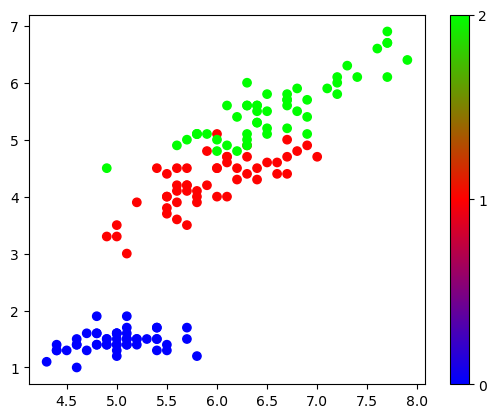

In [114]:
x1 = iris.data[:, 0]
x3 = iris.data[:, 2]

plt.scatter(x1, x3, c=iris.target, cmap='brg')
plt.colorbar(ticks=[0, 1, 2])
plt.show()